In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!git clone https://github.com/zalandoresearch/fashion-mnist.git

Cloning into 'fashion-mnist'...
remote: Enumerating objects: 762, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 762 (delta 0), reused 3 (delta 0), pack-reused 758
Receiving objects: 100% (762/762), 105.85 MiB | 34.39 MiB/s, done.
Resolving deltas: 100% (444/444), done.


In [5]:
%cd /content/fashion-mnist

/content/fashion-mnist


In [6]:
import utils.mnist_reader as mnist_reader
X_train, y_train = mnist_reader.load_mnist('data/fashion', kind='train')
X_test, y_test = mnist_reader.load_mnist('data/fashion', kind='t10k')

In [15]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000, 1)
(10000, 784)
(10000,)


In [22]:
# Splitting train set into ratio of 85:15 train to validation set 
from sklearn.model_selection import train_test_split

X_train_valid, X_test_valid, y_train_valid, y_test_valid = train_test_split(X_train, y_train, train_size=0.85, test_size=0.15, shuffle=True)

In [23]:
print(X_train_valid.shape)
print(X_test_valid.shape)
print(y_train_valid.shape)
print(y_test_valid.shape)

(51000, 784)
(9000, 784)
(51000, 1)
(9000, 1)


##Training the Model

training the models for different activation functions such as sigmoid,
relu, tanh and linear

In [24]:
from sklearn.neural_network import MLPClassifier

In [ ]:
# for sigmoid activation function 
mlp_sigmoid = MLPClassifier(max_iter=20, activation='logistic', hidden_layer_sizes=(256,32), verbose=False)
mlp_sigmoid.fit(X_train, y_train)

mlp_sigmoid_valid = MLPClassifier(max_iter=20, activation='logistic', hidden_layer_sizes=(256,32), verbose=False)
mlp_sigmoid_valid.fit(X_train_valid, y_train_valid)

In [ ]:
# for linear activation function 
mlp_relu = MLPClassifier(max_iter=20, activation='relu', hidden_layer_sizes=(256,32), verbose=False)
mlp_relu.fit(X_train, y_train)

mlp_relu_valid = MLPClassifier(max_iter=20, activation='relu', hidden_layer_sizes=(256,32), verbose=False)
mlp_relu_valid.fit(X_train_valid, y_train_valid)

In [ ]:
# for tanh activation function
mlp_tanh = MLPClassifier(max_iter=20, activation='tanh', hidden_layer_sizes=(256,32), verbose=False)
mlp_tanh.fit(X_train, y_train)

mlp_tanh_valid = MLPClassifier(max_iter=20, activation='tanh', hidden_layer_sizes=(256,32), verbose=False)
mlp_tanh_valid.fit(X_train, y_train)

In [ ]:
# for linear activation function
mlp_linear = MLPClassifier(max_iter=20, activation='identity', hidden_layer_sizes=(256,32), verbose=False)
mlp_linear.fit(X_train, y_train)

mlp_linear_valid = MLPClassifier(max_iter=20, activation='identity', hidden_layer_sizes=(256,32), verbose=False)
mlp_linear_valid.fit(X_train, y_train)

Plot Training loss vs epochs for the model at diff activation 
functions

In [36]:
sigmoid_loss_arr = mlp_sigmoid.loss_curve_
relu_loss_arr = mlp_relu.loss_curve_
tanh_loss_arr = mlp_tanh.loss_curve_
linear_loss_arr = mlp_linear.loss_curve_

In [37]:
sigmoid_loss_arr_valid = mlp_sigmoid_valid.loss_curve_
relu_loss_arr_valid = mlp_relu_valid.loss_curve_
tanh_loss_arr_valid = mlp_tanh_valid.loss_curve_
linear_loss_arr_valid = mlp_linear_valid.loss_curve_

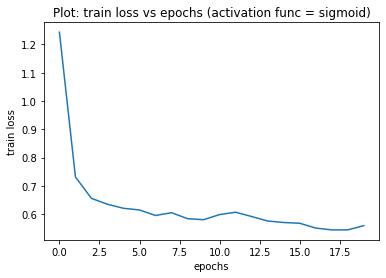

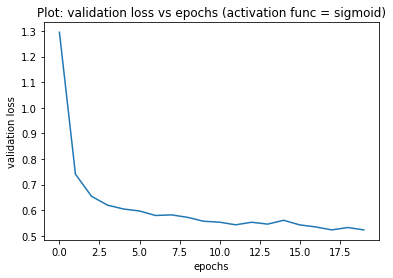

In [38]:
# plot for activation sigmoid
import matplotlib.pyplot as plt

plt.plot(sigmoid_loss_arr)
plt.title("Plot: train loss vs epochs (activation func = sigmoid)")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()
# plt.savefig("sigmoid.jpg")

plt.plot(sigmoid_loss_arr_valid)
plt.title("Plot: validation loss vs epochs (activation func = sigmoid)")
plt.ylabel("validation loss")   
plt.xlabel("epochs")
plt.show()

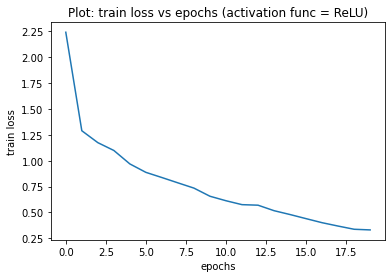

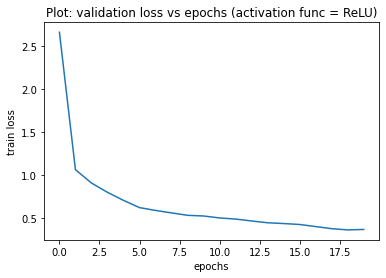

In [39]:
# plot for activation Relu
import matplotlib.pyplot as plt

plt.plot(relu_loss_arr)
plt.title("Plot: train loss vs epochs (activation func = ReLU)")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()
# plt.savefig("ReLU.jpg")

plt.plot(relu_loss_arr_valid)
plt.title("Plot: validation loss vs epochs (activation func = ReLU)")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()
# plt.savefig("ReLU.jpg")

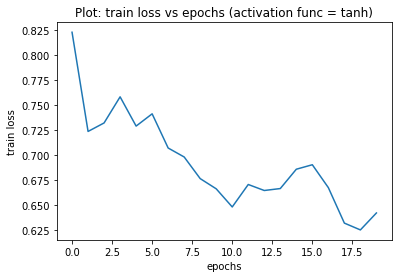

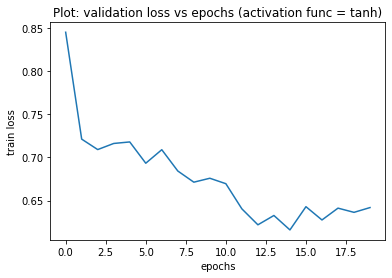

In [40]:
# plot for activation tanh
import matplotlib.pyplot as plt

plt.plot(tanh_loss_arr)
plt.title("Plot: train loss vs epochs (activation func = tanh)")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()
# plt.savefig("tanh.jpg")

plt.plot(tanh_loss_arr_valid)
plt.title("Plot: validation loss vs epochs (activation func = tanh)")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()
# plt.savefig("tanh.jpg")

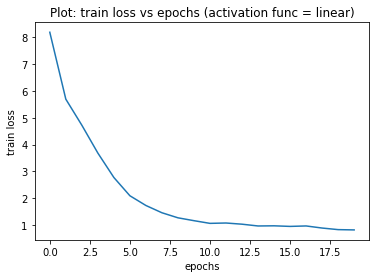

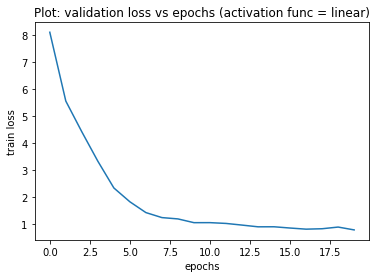

<Figure size 432x288 with 0 Axes>

In [41]:
# plot for activation linear
import matplotlib.pyplot as plt

plt.plot(linear_loss_arr)
plt.title("Plot: train loss vs epochs (activation func = linear)")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()
plt.savefig("linear.jpg")

plt.plot(linear_loss_arr_valid)
plt.title("Plot: validation loss vs epochs (activation func = linear)")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()
plt.savefig("linear.jpg")

In [44]:
# Scores of the model at different activation functions 
print(mlp_sigmoid.score(X_test, y_test))
print(mlp_relu.score(X_test, y_test))
print(mlp_tanh.score(X_test, y_test))
print(mlp_linear.score(X_test, y_test))

# we can see relu is the best activation function 
# because the model scores highest at activation function relu
print()
# Scores of the model at different activation functions (validation set)
print(mlp_sigmoid_valid.score(X_test_valid, y_test_valid))
print(mlp_relu_valid.score(X_test_valid, y_test_valid))
print(mlp_tanh_valid.score(X_test_valid, y_test_valid))
print(mlp_linear_valid.score(X_test_valid, y_test_valid))

0.7608
0.8634
0.7567
0.8032

0.8108888888888889
0.8472222222222222
0.7418888888888889
0.8175555555555556


Part 2

In [86]:
# training the model at learning rate = 0.1

mlp_alpha1 = MLPClassifier(learning_rate_init=0.1, max_iter=50, activation='relu', hidden_layer_sizes=(256,32))
mlp_alpha1.fit(X_train, y_train)

mlp_alpha1_valid = MLPClassifier(learning_rate_init=0.1, max_iter=50, activation='relu', hidden_layer_sizes=(256,32))
mlp_alpha1_valid.fit(X_train_valid, y_train_valid)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(256, 32), learning_rate_init=0.1, max_iter=50)

In [85]:
# training the model at learning rate = 0.01

mlp_alpha2 = MLPClassifier(learning_rate_init=0.01, max_iter=50, activation='relu', hidden_layer_sizes=(256,32))
mlp_alpha2.fit(X_train, y_train)

mlp_alpha2_valid = MLPClassifier(learning_rate_init=0.01, max_iter=50, activation='relu', hidden_layer_sizes=(256,32))
mlp_alpha2_valid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(hidden_layer_sizes=(256, 32), learning_rate_init=0.01,
              max_iter=50)

In [87]:
# training the model at learning rate = 0.001

mlp_alpha3 = MLPClassifier(learning_rate_init=0.001, max_iter=50, activation='relu', hidden_layer_sizes=(256,32))
mlp_alpha3.fit(X_train, y_train)

mlp_alpha3_valid = MLPClassifier(learning_rate_init=0.001, max_iter=50, activation='relu', hidden_layer_sizes=(256,32))
mlp_alpha3_valid.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converg

MLPClassifier(hidden_layer_sizes=(256, 32), max_iter=50)

In [88]:
# Scores of the models at different learning rates as 0.1, 0.01 and 0.001
print(mlp_alpha1.score(X_test, y_test))
print(mlp_alpha2.score(X_test, y_test))
print(mlp_alpha3.score(X_test, y_test))

print()
# Scores of the models at different learning rates as 0.1, 0.01 and 0.001 (on validation set)
print(mlp_alpha1.score(X_test_valid, y_test_valid))
print(mlp_alpha2.score(X_test_valid, y_test_valid))
print(mlp_alpha3.score(X_test_valid, y_test_valid))

0.1
0.1
0.8787

0.09411111111111112
0.10055555555555555
0.9332222222222222


In [71]:
alpha1_loss_arr = mlp_alpha1.loss_curve_
alpha2_loss_arr = mlp_alpha2.loss_curve_
alpha3_loss_arr = mlp_alpha3.loss_curve_

In [72]:
alpha1_loss_arr_valid = mlp_alpha1_valid.loss_curve_
alpha2_loss_arr_valid = mlp_alpha2_valid.loss_curve_
alpha3_loss_arr_valid = mlp_alpha3_valid.loss_curve_

PLots of Part2

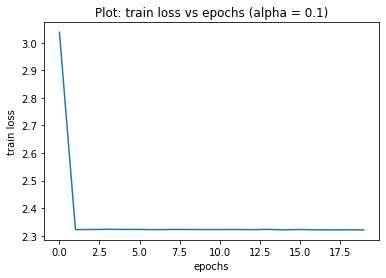

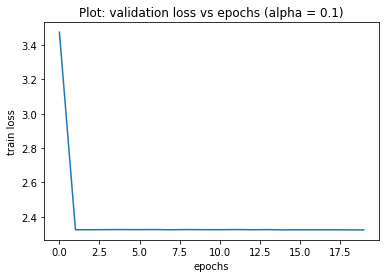

<Figure size 432x288 with 0 Axes>

In [74]:
# plot for alpha1
import matplotlib.pyplot as plt

plt.plot(alpha1_loss_arr)
plt.title("Plot: train loss vs epochs (alpha = 0.1)")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()


plt.plot(alpha1_loss_arr_valid)
plt.title("Plot: validation loss vs epochs (alpha = 0.1)")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()

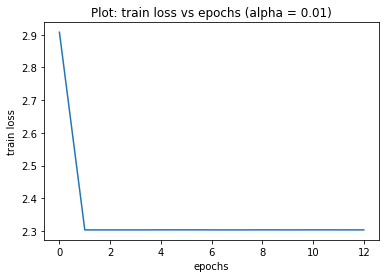

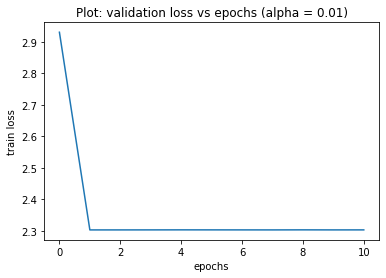

In [76]:
# plot for alpha2
import matplotlib.pyplot as plt

plt.plot(alpha2_loss_arr)
plt.title("Plot: train loss vs epochs (alpha = 0.01)")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()


plt.plot(alpha2_loss_arr_valid)
plt.title("Plot: validation loss vs epochs (alpha = 0.01)")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()

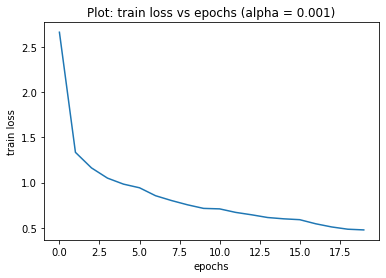

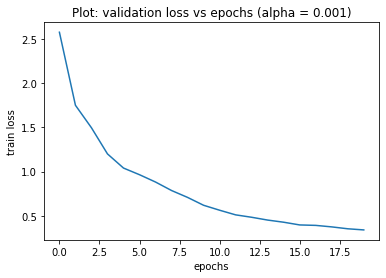

In [77]:
# plot for alpha3
import matplotlib.pyplot as plt

plt.plot(alpha3_loss_arr)
plt.title("Plot: train loss vs epochs (alpha = 0.001)")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()


plt.plot(alpha3_loss_arr_valid)
plt.title("Plot: validation loss vs epochs (alpha = 0.001)")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()

Part 3

In [ ]:
mlp1 = MLPClassifier(max_iter=20, hidden_layer_sizes=(252,30), verbose=False) #HLs = (252,30) #default activation function is relu
mlp1.fit(X_train, y_train) 

In [79]:
mlp2 = MLPClassifier(max_iter=20, hidden_layer_sizes=(244,36), verbose=False) #HLs = (244,36)
mlp2.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(244, 36), max_iter=20)

In [80]:
mlp3 = MLPClassifier(max_iter=20, hidden_layer_sizes=(228,18), verbose=False) #HLs = (228,18)
mlp3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


MLPClassifier(hidden_layer_sizes=(228, 18), max_iter=20)

Plots for the models

In [81]:
loss_arr1 = mlp1.loss_curve_
loss_arr2 = mlp2.loss_curve_
loss_arr3 = mlp3.loss_curve_

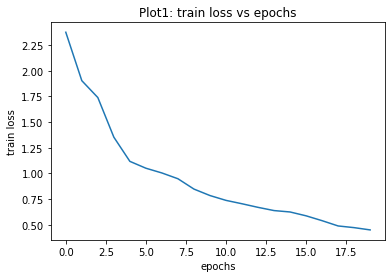

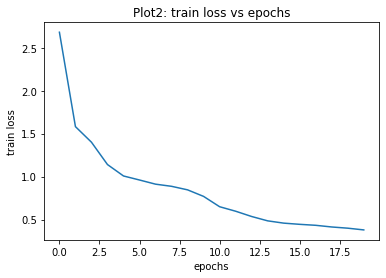

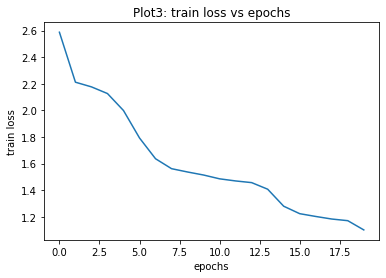

In [90]:
# plot1 
plt.plot(loss_arr1)
plt.title("Plot1: train loss vs epochs")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()

# Plot2
plt.plot(loss_arr2)
plt.title("Plot2: train loss vs epochs")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()

# Plot3
plt.plot(loss_arr3)
plt.title("Plot3: train loss vs epochs")
plt.ylabel("train loss")   
plt.xlabel("epochs")
plt.show()

In [91]:
print(mlp1.score(X_test, y_test))
print(mlp2.score(X_test, y_test))
print(mlp3.score(X_test, y_test))

0.8154
0.8489
0.565


Part 4

In [61]:
# we applied grid search at activation function = relu
mlp_grid_srch = MLPClassifier(max_iter=10)

dict_parameters = {'hidden_layer_sizes': [(256, 32)],
              'activation': ['relu'],
              'solver': ['adam'],
              'alpha': [0.001],
              'learning_rate': ['constant']}


In [62]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grdSrch_clf = GridSearchCV(mlp_grid_srch, dict_parameters, n_jobs=-1, cv=2)
grdSrch_clf.fit(X_train, y_train)

In [64]:
# print the best Parameters of the Classifiers
print("Best Parameters = {}".format(grdSrch_clf.best_params_))

Best Parameters = {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (256, 32), 'learning_rate': 'constant', 'solver': 'adam'}


In [93]:
grdSrch_clf.score(X_test, y_test)

0.7205

In [94]:
grdSrch_clf.score(X_test_valid, y_test_valid)

0.7326666666666667